In [1]:
import itertools
import numpy as np
import pandas as pd 
from numbers import Number
import sqlite3
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import linregress
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
import gzip
import pickle
import pandasql
import decimal
import string

In [2]:
path = 'zippedData/im.db'
conn = sqlite3.connect(path)

cur = conn.cursor()
cur.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")

table_names = cur.fetchall() # Fetch the result and store it in table_names
table_names

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

In [3]:
!pwd

/c/Users/Scott Libby/Desktop/code/Phase2_SQL/Project_REPO/dsc-phase-2-project-v3


In [4]:
cur.execute("""SELECT * FROM movie_basics;""")
df = pd.read_sql(
    """
    SELECT *
    FROM sqlite_master
    """, conn)
df[df['type'] == 'table']

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [5]:
movie_basics=pd.read_sql("""SELECT * FROM movie_basics ;""", conn)
movie_basics = movie_basics.rename(columns={'primary_title': 'movie'})
movie_basics = movie_basics.dropna(subset=['genres'])
movie_basics

,movie_id,movie,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146138,tt9916428,The Secret of China,The Secret of China,2019,NaN,"Adventure,History,War"
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy


In [6]:
Horror_df = movie_basics[movie_basics['genres'].str.contains('Horror', case=False)]
Horror_df = Horror_df.loc[:, ['movie', 'genres']]
def keep_only_GENRE(genres):
    genre_list = genres.split(',')
    if 'Horror' in genre_list:
        return 'Horror'
    else:
        return ','.join(genre_list)

Horror_df['genres'] = Horror_df['genres'].apply(keep_only_GENRE)
Horror_df['genres'] = Horror_df['genres'].str.lower()
Horror_df['movie'] = Horror_df['movie'].str.lower()
Horror_df

,movie,genres
6,bigfoot,horror
39,the wicker tree,horror
51,the evil within,horror
97,the possession,horror
101,caleuche: el llamado del mar,horror
...,...,...
146054,the curse of eve,horror
146055,badmen with a good behavior,horror
146062,scream returns,horror
146064,american terror story,horror


In [7]:
Drama_df = movie_basics[movie_basics['genres'].str.contains('Drama', case=False)]
Drama_df = Drama_df.loc[:, ['movie', 'genres']]
def keep_only_GENRE(genres):
    genre_list = genres.split(',')
    if 'Drama' in genre_list:
        return 'Drama'
    else:
        return ','.join(genre_list)

Drama_df['genres'] = Drama_df['genres'].apply(keep_only_GENRE)
Drama_df['genres'] = Drama_df['genres'].str.lower()
Drama_df['movie'] = Drama_df['movie'].str.lower()
Drama_df

,movie,genres
0,sunghursh,drama
1,one day before the rainy season,drama
2,the other side of the wind,drama
3,sabse bada sukh,drama
4,the wandering soap opera,drama
...,...,...
146124,the holden family plan,drama
146132,the last white witch,drama
146135,the rehearsal,drama
146137,safeguard,drama


In [8]:
Documentary_df = movie_basics[movie_basics['genres'].str.contains('Documentary', case=False)]
Documentary_df = Documentary_df.loc[:, ['movie', 'genres']]
def keep_only_drama(genres):
    genre_list = genres.split(',')
    if 'Documentary' in genre_list:
        return 'Documentary'
    else:
        return ','.join(genre_list)

Documentary_df['genres'] = Documentary_df['genres'].apply(keep_only_drama)
Documentary_df['genres'] = Documentary_df['genres'].str.lower()
Documentary_df['movie'] = Documentary_df['movie'].str.lower()
Documentary_df

,movie,genres
8,o silêncio,documentary
12,cooper and hemingway: the true gen,documentary
14,t.g.m. - osvoboditel,documentary
24,akakis mogzauroba,documentary
25,seven jews from my class,documentary
...,...,...
146133,the mystery of a buryat lama,documentary
146134,drømmeland,documentary
146136,illenau - die geschichte einer ehemaligen heil...,documentary
146140,rodolpho teóphilo - o legado de um pioneiro,documentary


In [9]:
directors=pd.read_sql(
"""
SELECT *
FROM directors
;
""", conn)
directors

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


In [10]:
known_for=pd.read_sql(
"""
SELECT *
FROM known_for
;
""", conn)
known_for

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534
...,...,...
1638255,nm9990690,tt9090932
1638256,nm9990690,tt8737130
1638257,nm9991320,tt8734436
1638258,nm9991320,tt9615610


In [11]:
movie_akas=pd.read_sql(
"""
SELECT *
FROM movie_akas
;
""", conn)
movie_akas = movie_akas.rename(columns={'title': 'movie'})
movie_akas

,movie_id,ordering,movie,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


In [12]:
movie_ratings=pd.read_sql(
"""
SELECT *
FROM movie_ratings
;
""", conn)
movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [13]:
persons=pd.read_sql(
"""
SELECT *
FROM persons
;
""", conn)
persons = persons[persons['primary_profession'].str.contains('director', na=False)]
persons = persons.drop(['birth_year', 'death_year'], axis=1)
persons

,person_id,primary_name,primary_profession
5,nm0062879,Ruel S. Bayani,"director,production_manager,miscellaneous"
10,nm0064023,Bryan Beasley,"director,producer,writer"
15,nm0066163,Arnaud Bedouët,"actor,writer,director"
16,nm0066268,Steve Mitchell Beebe,"editorial_department,director,editor"
21,nm0068170,Dylan Bell,"director,actor,producer"
...,...,...,...
606620,nm9971456,Zheng Wei,director
606625,nm9978371,Zach Campbell,"actor,cinematographer,assistant_director"
606628,nm9980896,Rama Narayanan,"director,writer"
606629,nm9981679,Samir Eshra,"director,writer,cinematographer"


In [14]:
principals=pd.read_sql(
"""
SELECT *
FROM principals
;
""", conn)
principals

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,None,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,None,None
1028184,tt9692684,4,nm6009913,writer,writer,None


In [15]:
writers=pd.read_sql(
"""
SELECT *
FROM writers
;
""", conn)
writers

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087
...,...,...
255868,tt8999892,nm10122246
255869,tt8999974,nm10122357
255870,tt9001390,nm6711477
255871,tt9004986,nm4993825


In [16]:
runtime=pd.read_sql("""SELECT movie_id, primary_title, runtime_minutes
FROM movie_basics
;
""", conn)
runtime = runtime.rename(columns={'primary_title': 'movie'})
runtime

,movie_id,movie,runtime_minutes
0,tt0063540,Sunghursh,175.0
1,tt0066787,One Day Before the Rainy Season,114.0
2,tt0069049,The Other Side of the Wind,122.0
3,tt0069204,Sabse Bada Sukh,NaN
4,tt0100275,The Wandering Soap Opera,80.0
...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,123.0
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,NaN
146141,tt9916706,Dankyavar Danka,NaN
146142,tt9916730,6 Gunn,116.0


In [17]:
Directors1 = persons.merge(known_for, on='person_id')
Directors1

,person_id,primary_name,primary_profession,movie_id
0,nm0062879,Ruel S. Bayani,"director,production_manager,miscellaneous",tt2590280
1,nm0062879,Ruel S. Bayani,"director,production_manager,miscellaneous",tt0352080
2,nm0062879,Ruel S. Bayani,"director,production_manager,miscellaneous",tt0216559
3,nm0062879,Ruel S. Bayani,"director,production_manager,miscellaneous",tt2057445
4,nm0064023,Bryan Beasley,"director,producer,writer",tt3501180
...,...,...,...,...
461856,nm9980896,Rama Narayanan,"director,writer",tt10127906
461857,nm9980896,Rama Narayanan,"director,writer",tt8715016
461858,nm9980896,Rama Narayanan,"director,writer",tt8919136
461859,nm9980896,Rama Narayanan,"director,writer",tt8929818


In [18]:
Directors = Directors1.merge(movie_basics, on='movie_id')
Directors['movie'] = Directors['movie'].str.lower()
Directors

,person_id,primary_name,primary_profession,movie_id,movie,original_title,start_year,runtime_minutes,genres
0,nm0062879,Ruel S. Bayani,"director,production_manager,miscellaneous",tt2590280,one more try,One More Try,2012,100.0,Drama
1,nm0062879,Ruel S. Bayani,"director,production_manager,miscellaneous",tt2057445,no other woman,No Other Woman,2011,101.0,"Drama,Romance,Thriller"
2,nm0033561,Nancy Arcega,"production_designer,art_director,actress",tt2057445,no other woman,No Other Woman,2011,101.0,"Drama,Romance,Thriller"
3,nm2568989,Crisanto Aquino,"assistant_director,miscellaneous,actor",tt2057445,no other woman,No Other Woman,2011,101.0,"Drama,Romance,Thriller"
4,nm2074966,Derek Ramsay,"actor,writer,director",tt2057445,no other woman,No Other Woman,2011,101.0,"Drama,Romance,Thriller"
...,...,...,...,...,...,...,...,...,...
188632,nm9748617,Frank W Chen,"director,camera_department,music_department",tt8234502,late life: the chien-ming wang story,Late Life: The Chien-Ming Wang Story,2018,99.0,"Documentary,Sport"
188633,nm9760643,Kamal Subramaniam,director,tt8256118,marumugam,Marumugam,2014,NaN,Thriller
188634,nm9909687,Bastien Larue,"director,writer,cinematographer",tt8561352,les officiants,Les officiants,2016,52.0,Documentary
188635,nm9914242,Abu Iddris,"producer,director,writer",tt8574516,hashtag,HashTag,2018,NaN,Thriller


In [19]:
movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
movie_info = pd.read_table('zippedData/rt.movie_info.tsv.gz')
rt_reviews = pd.read_table('zippedData/rt.reviews.tsv.gz', encoding='unicode_escape')
tmdb_movies = pd.read_csv('zippedData/tmdb.movies.csv.gz')
movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [20]:
with gzip.open('zippedData/bom.movie_gross.csv.gz', 'rb') as f:
    movie_gross = pd.read_csv(f)
for col in movie_gross.select_dtypes(include=['object']):
    movie_gross[col] = movie_gross[col].str.lower()

movie_gross = movie_gross.rename(columns={'title': 'movie'})
    
movie_grossCLEAN = movie_gross.applymap(lambda x: str(x).replace(',', '').replace('$', ''))
movie_grossCLEAN

,movie,studio,domestic_gross,foreign_gross,year
0,toy story 3,bv,415000000.0,652000000,2010
1,alice in wonderland (2010),bv,334200000.0,691300000,2010
2,harry potter and the deathly hallows part 1,wb,296000000.0,664300000,2010
3,inception,wb,292600000.0,535700000,2010
4,shrek forever after,p/dw,238700000.0,513900000,2010
...,...,...,...,...,...
3382,the quake,magn.,6200.0,nan,2018
3383,edward ii (2018 re-release),fm,4800.0,nan,2018
3384,el pacto,sony,2500.0,nan,2018
3385,the swan,synergetic,2400.0,nan,2018


In [21]:
with gzip.open('zippedData/rt.movie_info.tsv.gz', 'rb') as f:
    movie_info = pd.read_csv(f, delimiter='\t', encoding='unicode_escape')
for col in movie_info.select_dtypes(include=['object']):
    movie_info[col] = movie_info[col].str.lower()
    
movie_infoCLEAN = movie_info.applymap(lambda x: str(x).replace(',', '').replace('$', ''))
movie_infoCLEAN

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,this gritty fast-paced and innovative police d...,r,action and adventure|classics|drama,william friedkin,ernest tidyman,oct 9 1971,sep 25 2001,nan,nan,104 minutes,nan
1,3,new york city not-too-distant-future: eric pac...,r,drama|science fiction and fantasy,david cronenberg,david cronenberg|don delillo,aug 17 2012,jan 1 2013,,600000,108 minutes,entertainment one
2,5,illeana douglas delivers a superb performance ...,r,drama|musical and performing arts,allison anders,allison anders,sep 13 1996,apr 18 2000,nan,nan,116 minutes,nan
3,6,michael douglas runs afoul of a treacherous su...,r,drama|mystery and suspense,barry levinson,paul attanasio|michael crichton,dec 9 1994,aug 27 1997,nan,nan,128 minutes,nan
4,7,nan,nr,drama|romance,rodney bennett,giles cooper,nan,nan,nan,nan,200 minutes,nan
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,forget terrorists or hijackers -- there's a ha...,r,action and adventure|horror|mystery and suspense,nan,nan,aug 18 2006,jan 2 2007,,33886034,106 minutes,new line cinema
1556,1997,the popular saturday night live sketch was exp...,pg,comedy|science fiction and fantasy,steve barron,terry turner|tom davis|dan aykroyd|bonnie turner,jul 23 1993,apr 17 2001,nan,nan,88 minutes,paramount vantage
1557,1998,based on a novel by richard powell when the lo...,g,classics|comedy|drama|musical and performing arts,gordon douglas,nan,jan 1 1962,may 11 2004,nan,nan,111 minutes,nan
1558,1999,the sandlot is a coming-of-age story about a g...,pg,comedy|drama|kids and family|sports and fitness,david mickey evans,david mickey evans|robert gunter,apr 1 1993,jan 29 2002,nan,nan,101 minutes,nan


In [22]:
with gzip.open('zippedData/rt.reviews.tsv.gz', 'rb') as f:
    rt_reviews = pd.read_csv(f, delimiter='\t', encoding='unicode_escape')
for col in rt_reviews.select_dtypes(include=['object']):
    rt_reviews[col] = rt_reviews[col].str.lower()
    rt_reviewsCLEAN = rt_reviews.applymap(lambda x: str(x).replace(',', '').replace('$', ''))
rt_reviewsCLEAN

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,a distinctly gallows take on contemporary fina...,3/5,fresh,pj nabarro,0,patrick nabarro,november 10 2018
1,3,it's an allegory in search of a meaning that n...,nan,rotten,annalee newitz,0,io9.com,may 23 2018
2,3,... life lived in a bubble in financial dealin...,nan,fresh,sean axmaker,0,stream on demand,january 4 2018
3,3,continuing along a line introduced in last yea...,nan,fresh,daniel kasman,0,mubi,november 16 2017
4,3,... a perverse twist on neorealism...,nan,fresh,nan,0,cinema scope,october 12 2017
...,...,...,...,...,...,...,...,...
54427,2000,the real charm of this trifle is the deadpan c...,nan,fresh,laura sinagra,1,village voice,september 24 2002
54428,2000,nan,1/5,rotten,michael szymanski,0,zap2it.com,september 21 2005
54429,2000,nan,2/5,rotten,emanuel levy,0,emanuellevy.com,july 17 2005
54430,2000,nan,2.5/5,rotten,christopher null,0,filmcritic.com,september 7 2003


In [23]:
with gzip.open('zippedData/tmdb.movies.csv.gz', 'rb') as f:
    tmdb_movies = pd.read_csv(f)

for col in tmdb_movies.select_dtypes(include=['object']):
    tmdb_movies[col] = tmdb_movies[col].str.lower()

tmdb_movies = tmdb_movies.rename(columns={'original_title': 'movie'})
tmdb_movies['genre_ids'] = tmdb_movies['genre_ids'].str.replace('[', '').str.replace(']', '')

tmdb_moviesCLEAN = tmdb_movies.applymap(lambda x: str(x).replace(',', '').replace('$', ''))

# Define a dictionary to map genre ID numbers to genre names
genre_id_mapping = {
    '28': 'action',
    '12': 'adventure',
    '16': 'animation',
    '35': 'comedy',
    '80': 'crime',
    '99': 'documentary',
    '18': 'drama',
    '10751': 'family',
    '14': 'fantasy',
    '36': 'history',
    '27': 'horror',
    '10402': 'music',
    '9648': 'mystery',
    '878': 'science fiction',
    '10770': 'tv movie',
    '53': 'thriller',
    '10752': 'war',
    '37': 'western'
}

# Replace genre ID numbers with genre names in the 'genre_ids' column
for genre_id, genre_name in genre_id_mapping.items():
    tmdb_moviesCLEAN['genre_ids'] = tmdb_moviesCLEAN['genre_ids'].str.replace(genre_id, genre_name)
tmdb_moviesCLEAN.rename(columns={'movieNAME': 'movie'}, inplace=True)
tmdb_moviesCLEAN

,Unnamed: 0,genre_ids,id,original_language,movie,popularity,release_date,title,vote_average,vote_count
0,0,adventure fantasy family,12444,en,harry potter and the deathly hallows: part 1,33.533,2010-11-19,harry potter and the deathly hallows: part 1,7.7,10788
1,1,fantasy adventure animation family,10191,en,how to train your dragon,28.734,2010-03-26,how to train your dragon,7.7,7610
2,2,adventure action science fiction,10138,en,iron man 2,28.515,2010-05-07,iron man 2,6.8,12368
3,3,animation comedy family,862,en,toy story,28.005,1995-11-22,toy story,7.9,10174
4,4,action science fiction adventure,27205,en,inception,27.92,2010-07-16,inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,horror drama,488143,en,laboratory conditions,0.6,2018-10-13,laboratory conditions,0.0,1
26513,26513,drama thriller,485975,en,_exhibit_84xxx_,0.6,2018-05-01,_exhibit_84xxx_,0.0,1
26514,26514,fantasy action adventure,381231,en,the last one,0.6,2018-10-01,the last one,0.0,1
26515,26515,family adventure action,366854,en,trailer made,0.6,2018-06-22,trailer made,0.0,1


In [24]:
with gzip.open('zippedData/tn.movie_budgets.csv.gz', 'rb') as f:
    movie_budgets = pd.read_csv(f)
# lowercase all strings
for col in movie_budgets.select_dtypes(include=['object']):
    movie_budgets[col] = movie_budgets[col].str.lower()
# remove all ',' and '$' delimiters 
    movie_budgetsCLEAN = movie_budgets.applymap(lambda x: str(x).replace(',', '').replace('$', ''))
movie_budgetsCLEAN

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,dec 18 2009,avatar,425000000,760507625,2776345279
1,2,may 20 2011,pirates of the caribbean: on stranger tides,410600000,241063875,1045663875
2,3,jun 7 2019,dark phoenix,350000000,42762350,149762350
3,4,may 1 2015,avengers: age of ultron,330600000,459005868,1403013963
4,5,dec 15 2017,star wars ep. viii: the last jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,dec 31 2018,red 11,7000,0,0
5778,79,apr 2 1999,following,6000,48482,240495
5779,80,jul 13 2005,return to the land of wonders,5000,1338,1338
5780,81,sep 29 2015,a plague so pleasant,1400,0,0


In [25]:
GENRES7 = tmdb_moviesCLEAN[['movie', 'genre_ids']].copy()
genre_id_mapping8 = {
    '28': 'action',
    '12': 'adventure',
    '16': 'animation',
    '35': 'comedy',
    '80': 'crime',
    '99': 'documentary',
    '18': 'drama',
    '10751': 'family',
    '14': 'fantasy',
    '36': 'history',
    '27': 'horror',
    '10402': 'music',
    '9648': 'mystery',
    '878': 'science fiction',
    '10770': 'tv movie',
    '53': 'thriller',
    '10752': 'war',
    '37': 'western'
}

# Split the genre_ids column into a list of strings
GENRES7['genre_ids'] = GENRES7['genre_ids'].str.split('|')

# Add a new column for each genre in the mapping
for genre_id, genre_name in genre_id_mapping.items():
    GENRES7[genre_name] = GENRES7['genre_ids'].apply(lambda x: genre_id in x).astype(int)
GENRES7['genre_ids'] = GENRES7['genre_ids'].astype(str).str.replace('[','').str.replace(']','').str.replace(' ','|').str.replace("'", "").str.replace(",", "")
GENRES7['genre_ids'] = GENRES7['genre_ids'].str.split('|')
genre_order = ['action', 'adventure', 'animation', 'comedy', 'crime', 'documentary', 'drama', 'family', 'fantasy', 'history', 'horror', 'music', 'mystery', 'science fiction', 'tv movie', 'thriller', 'war', 'western']

# Create a dictionary to map genre names to integer values
genre_int_mapping = {genre_name: index+1 for index, genre_name in enumerate(genre_order)}

# Iterate over the genre columns and assign integer values based on the substring in the genre_ids column
for genre_name in genre_order:
    GENRES7[genre_name] = 0

for index, row in GENRES7.iterrows():
    genre_list = row['genre_ids']
    for genre in genre_list:
        if genre in genre_int_mapping:
            genre_int = genre_int_mapping[genre]
            genre_name = genre_order[genre_int-1]
            GENRES7.at[index, genre_name] = genre_int
GENRES7

,movie,genre_ids,action,adventure,animation,comedy,crime,documentary,drama,family,fantasy,history,horror,music,mystery,science fiction,tv movie,thriller,war,western
0,harry potter and the deathly hallows: part 1,"[adventure, fantasy, family]",0,2,0,0,0,0,0,8,9,0,0,0,0,0,0,0,0,0
1,how to train your dragon,"[fantasy, adventure, animation, family]",0,2,3,0,0,0,0,8,9,0,0,0,0,0,0,0,0,0
2,iron man 2,"[adventure, action, science, fiction]",1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,toy story,"[animation, comedy, family]",0,0,3,4,0,0,0,8,0,0,0,0,0,0,0,0,0,0
4,inception,"[action, science, fiction, adventure]",1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26512,laboratory conditions,"[horror, drama]",0,0,0,0,0,0,7,0,0,0,11,0,0,0,0,0,0,0
26513,_exhibit_84xxx_,"[drama, thriller]",0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,16,0,0
26514,the last one,"[fantasy, action, adventure]",1,2,0,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0
26515,trailer made,"[family, adventure, action]",1,2,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0


In [26]:
GENRES7

,movie,genre_ids,action,adventure,animation,comedy,crime,documentary,drama,family,fantasy,history,horror,music,mystery,science fiction,tv movie,thriller,war,western
0,harry potter and the deathly hallows: part 1,"[adventure, fantasy, family]",0,2,0,0,0,0,0,8,9,0,0,0,0,0,0,0,0,0
1,how to train your dragon,"[fantasy, adventure, animation, family]",0,2,3,0,0,0,0,8,9,0,0,0,0,0,0,0,0,0
2,iron man 2,"[adventure, action, science, fiction]",1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,toy story,"[animation, comedy, family]",0,0,3,4,0,0,0,8,0,0,0,0,0,0,0,0,0,0
4,inception,"[action, science, fiction, adventure]",1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26512,laboratory conditions,"[horror, drama]",0,0,0,0,0,0,7,0,0,0,11,0,0,0,0,0,0,0
26513,_exhibit_84xxx_,"[drama, thriller]",0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,16,0,0
26514,the last one,"[fantasy, action, adventure]",1,2,0,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0
26515,trailer made,"[family, adventure, action]",1,2,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0


# DIRECTORS

In [27]:
directors_budget = Directors.merge(movie_budgetsCLEAN, on='movie')
directors_budget = directors_budget.rename(columns={'primary_name': 'director'})
directors_budget['director'] = directors_budget['director'].str.lower()
directors_budget

,person_id,director,primary_profession,movie_id,movie,original_title,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross
0,nm0070822,terry benedict,"producer,director,assistant_director",tt2119532,hacksaw ridge,Hacksaw Ridge,2016,139.0,"Biography,Drama,History",17,nov 4 2016,40000000,67209615,168904682
1,nm0192984,paul currie,"producer,director,assistant_director",tt2119532,hacksaw ridge,Hacksaw Ridge,2016,139.0,"Biography,Drama,History",17,nov 4 2016,40000000,67209615,168904682
2,nm1116918,sean lynch,"actor,director,writer",tt2119532,hacksaw ridge,Hacksaw Ridge,2016,139.0,"Biography,Drama,History",17,nov 4 2016,40000000,67209615,168904682
3,nm2124274,nicholas dare,"art_director,art_department,production_designer",tt2119532,hacksaw ridge,Hacksaw Ridge,2016,139.0,"Biography,Drama,History",17,nov 4 2016,40000000,67209615,168904682
4,nm1426773,tim ridge,"miscellaneous,special_effects,director",tt2119532,hacksaw ridge,Hacksaw Ridge,2016,139.0,"Biography,Drama,History",17,nov 4 2016,40000000,67209615,168904682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13360,nm9267400,jehan semper,"director,writer,producer",tt7379804,yes,Yes,2019,NaN,Sci-Fi,47,jun 24 2005,1700000,396035,661221
13361,nm9267400,jehan semper,"director,writer,producer",tt7594192,beautiful,Beautiful,2019,NaN,Drama,1,sep 29 2000,9000000,3134509,3134509
13362,nm6854035,deshawn hill,"writer,producer,director",tt5294776,holly,Holly,2015,NaN,"Action,Crime,Thriller",45,nov 9 2007,3000000,163069,163069
13363,nm9107499,musing derick tenn,director,tt7097350,kiss of death,Kiss of Death,2016,124.0,"Comedy,Drama",4,apr 21 1995,40000000,14942422,14942422


In [28]:
directors_budget77 = directors_budget.drop_duplicates(subset='movie')
directors_budget77

,person_id,director,primary_profession,movie_id,movie,original_title,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross
0,nm0070822,terry benedict,"producer,director,assistant_director",tt2119532,hacksaw ridge,Hacksaw Ridge,2016,139.0,"Biography,Drama,History",17,nov 4 2016,40000000,67209615,168904682
8,nm0085316,james black,"actor,producer,director",tt1701990,detention,Detention,2011,93.0,"Comedy,Horror,Mystery",45,apr 13 2012,10000000,0,0
17,nm0101047,david bowers,"animation_department,director,writer",tt2023453,diary of a wimpy kid: dog days,Diary of a Wimpy Kid: Dog Days,2012,94.0,"Comedy,Family",17,aug 3 2012,22000000,49008662,77229695
20,nm0101047,david bowers,"animation_department,director,writer",tt1650043,diary of a wimpy kid: rodrick rules,Diary of a Wimpy Kid: Rodrick Rules,2011,99.0,"Comedy,Family",80,mar 25 2011,18000000,52698535,73695194
21,nm0135952,nae caranfil,"writer,director,actor",tt2017486,closer to the moon,Closer to the Moon,2014,112.0,"Comedy,Crime,Drama",10,apr 17 2014,1500000,0,5396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13360,nm9267400,jehan semper,"director,writer,producer",tt7379804,yes,Yes,2019,NaN,Sci-Fi,47,jun 24 2005,1700000,396035,661221
13361,nm9267400,jehan semper,"director,writer,producer",tt7594192,beautiful,Beautiful,2019,NaN,Drama,1,sep 29 2000,9000000,3134509,3134509
13362,nm6854035,deshawn hill,"writer,producer,director",tt5294776,holly,Holly,2015,NaN,"Action,Crime,Thriller",45,nov 9 2007,3000000,163069,163069
13363,nm9107499,musing derick tenn,director,tt7097350,kiss of death,Kiss of Death,2016,124.0,"Comedy,Drama",4,apr 21 1995,40000000,14942422,14942422


In [29]:
directors_budget22 = Directors.merge(tmdb_moviesCLEAN, on='movie')
directors_budget22 = directors_budget22.rename(columns={'primary_name': 'director'})
directors_budget22['director'] = directors_budget22['director'].str.lower()
directors_budget22

,person_id,director,primary_profession,movie_id,movie,original_title,start_year,runtime_minutes,genres,Unnamed: 0,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count
0,nm0070822,terry benedict,"producer,director,assistant_director",tt2119532,hacksaw ridge,Hacksaw Ridge,2016,139.0,"Biography,Drama,History",17396,drama history war,324786,en,24.074,2016-11-04,hacksaw ridge,8.1,6608
1,nm0070822,terry benedict,"producer,director,assistant_director",tt2119532,hacksaw ridge,Hacksaw Ridge,2016,139.0,"Biography,Drama,History",20643,drama history war,324786,en,24.074,2016-11-04,hacksaw ridge,8.1,6608
2,nm0192984,paul currie,"producer,director,assistant_director",tt2119532,hacksaw ridge,Hacksaw Ridge,2016,139.0,"Biography,Drama,History",17396,drama history war,324786,en,24.074,2016-11-04,hacksaw ridge,8.1,6608
3,nm0192984,paul currie,"producer,director,assistant_director",tt2119532,hacksaw ridge,Hacksaw Ridge,2016,139.0,"Biography,Drama,History",20643,drama history war,324786,en,24.074,2016-11-04,hacksaw ridge,8.1,6608
4,nm1116918,sean lynch,"actor,director,writer",tt2119532,hacksaw ridge,Hacksaw Ridge,2016,139.0,"Biography,Drama,History",17396,drama history war,324786,en,24.074,2016-11-04,hacksaw ridge,8.1,6608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46984,nm7489311,thomas wirthensohn,director,tt4164462,homme less,Homme Less,2014,87.0,"Biography,Documentary",16842,documentary,353216,en,0.6,2015-08-07,homme less,7.0,1
46985,nm8220555,adam qiu,director,tt5812360,the mermaid princess,The Mermaid Princess,2016,77.0,Animation,19222,animation,459037,zh,0.945,2016-06-03,the mermaid princess,3.8,3
46986,nm8534337,julia nash,director,tt6181974,industrial accident: the story of wax trax! re...,Industrial Accident: The Story of Wax Trax! Re...,2018,95.0,"Biography,Documentary,History",21706,documentary history music,517208,en,2.458,2017-09-14,industrial accident: the story of wax trax! re...,9.0,1
46987,nm8940850,sean price,"sound_department,miscellaneous,director",tt6524704,here be dragons,Here Be Dragons,2018,70.0,Horror,10697,documentary,227800,en,0.6,2013-08-30,here be dragons,5.0,1


In [30]:
directors_budget22['runtime_minutes'] = pd.to_numeric(directors_budget22['runtime_minutes'], errors='coerce')
directors_budget22['popularity'] = pd.to_numeric(directors_budget22['popularity'], errors='coerce')

correlation = directors_budget22['runtime_minutes'].corr(directors_budget22['popularity'], method='pearson')
print("Correlation between movie runtime and total sales:", correlation)
directors_budget22 = directors_budget22.drop(directors_budget22[directors_budget22['runtime_minutes'] > 500.0].index)


Correlation between movie runtime and total sales: 0.40451750858112523


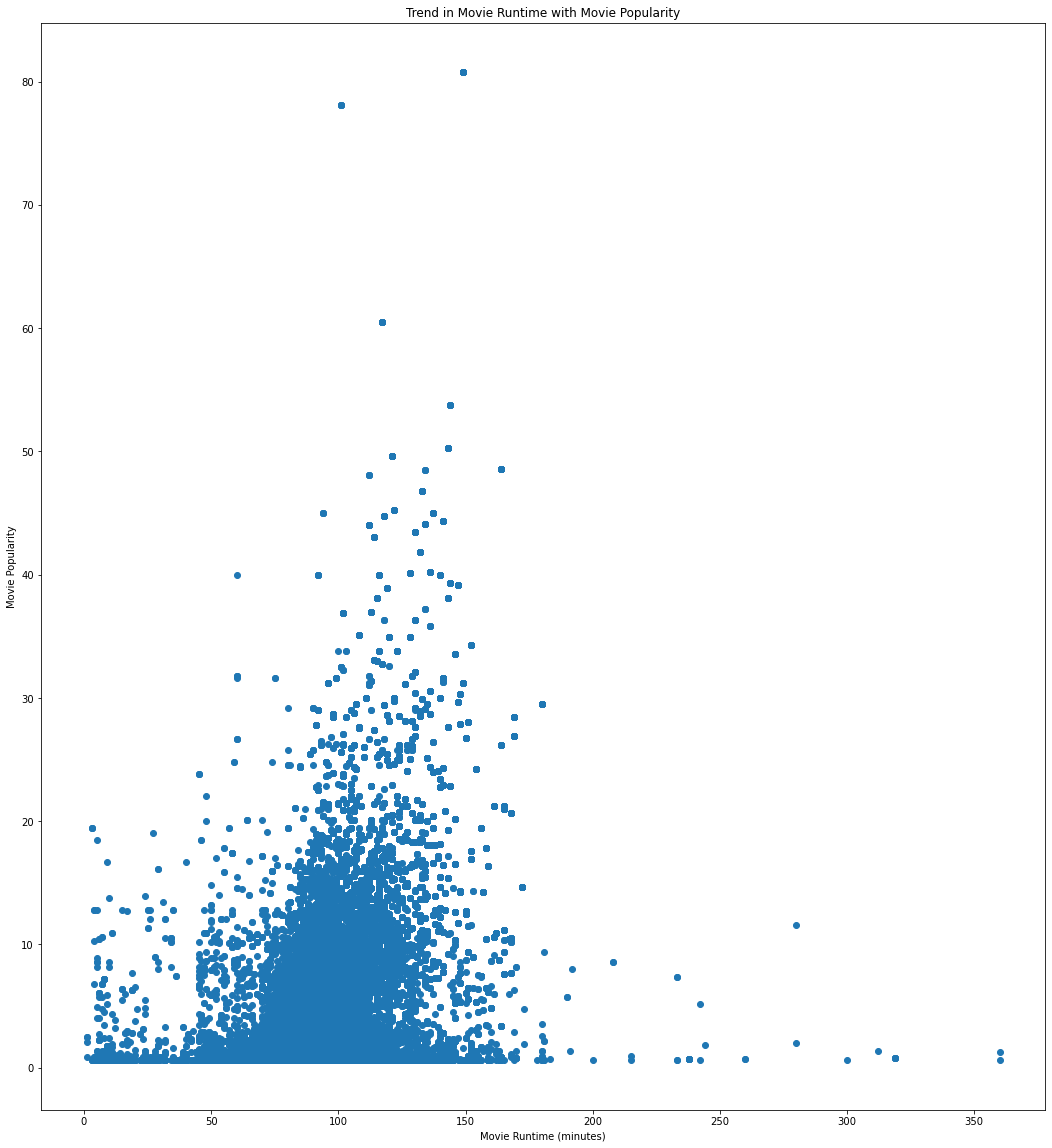

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 20))  # Set the figure size (width, height) in inches
plt.scatter(directors_budget22['runtime_minutes'], directors_budget22['popularity'])
plt.xlabel('Movie Runtime (minutes)')
plt.ylabel('Movie Popularity')
plt.title('Trend in Movie Runtime with Movie Popularity')
plt.show()

In [32]:
director_rating = directors_budget22.merge(movie_infoCLEAN, on='director')
director_rating.columns

Index(['person_id', 'director', 'primary_profession', 'movie_id', 'movie',
       'original_title', 'start_year', 'runtime_minutes', 'genres',
       'Unnamed: 0', 'genre_ids', 'id_x', 'original_language', 'popularity',
       'release_date', 'title', 'vote_average', 'vote_count', 'id_y',
       'synopsis', 'rating', 'genre', 'writer', 'theater_date', 'dvd_date',
       'currency', 'box_office', 'runtime', 'studio'],
      dtype='object')

In [33]:
director_rating

,person_id,director,primary_profession,movie_id,movie,original_title,start_year,runtime_minutes,genres,Unnamed: 0,...,synopsis,rating,genre,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,nm0087595,jamie blanks,"composer,director,editor",tt1890375,crawlspace,Crawlspace,2012,86.0,"Horror,Mystery,Sci-Fi",5522,...,the novel of the same name by author tom savag...,r,horror|mystery and suspense,nan,feb 2 2001,jul 24 2001,,19755422,96 minutes,warner bros. pictures
1,nm0087595,jamie blanks,"composer,director,editor",tt1890375,crawlspace,Crawlspace,2012,86.0,"Horror,Mystery,Sci-Fi",8331,...,the novel of the same name by author tom savag...,r,horror|mystery and suspense,nan,feb 2 2001,jul 24 2001,,19755422,96 minutes,warner bros. pictures
2,nm0101047,david bowers,"animation_department,director,writer",tt2023453,diary of a wimpy kid: dog days,Diary of a Wimpy Kid: Dog Days,2012,94.0,"Comedy,Family",5279,...,a young robot with incredible powers super str...,pg,action and adventure|animation|kids and family...,timothy hyde harris|david bowers|timothy harris,oct 23 2009,mar 16 2010,,19548064,94 minutes,summit entertainment
3,nm0101047,david bowers,"animation_department,director,writer",tt1650043,diary of a wimpy kid: rodrick rules,Diary of a Wimpy Kid: Rodrick Rules,2011,99.0,"Comedy,Family",2678,...,a young robot with incredible powers super str...,pg,action and adventure|animation|kids and family...,timothy hyde harris|david bowers|timothy harris,oct 23 2009,mar 16 2010,,19548064,94 minutes,summit entertainment
4,nm1026778,brad furman,"director,producer,writer",tt2364841,runner runner,Runner Runner,2013,88.0,"Crime,Thriller",8010,...,based on a true story u.s. customs agent rober...,r,drama,ellen brown furman,jul 13 2016,oct 11 2016,,15425870,127 minutes,broad green pictures
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,nm3507609,simon wells,"cinematographer,producer,director",tt5715234,carnivore: werewolf of london,Carnivore: Werewolf of London,2017,82.0,"Horror,Thriller",22208,...,take out the trash eat your broccoli-who needs...,pg,action and adventure|animation|comedy|science ...,simon wells|wendy wells,mar 11 2011,aug 9 2011,,21379315,88 minutes,walt disney pictures
574,nm3618781,mostofa sarwar farooki,"director,producer,writer",tt2564706,television,Television,2012,106.0,Drama,2065,...,the story of the film 'television' deals with ...,nr,comedy|drama|romance,mostofa sarwar farooki|anisul hoque,nan,nan,nan,nan,106 minutes,nan
575,nm6210703,yasir jaswal,"director,writer,music_department",tt3460084,jalaibee,Jalaibee,2015,117.0,"Action,Crime,Thriller",16729,...,jalaibee is a tale of two friends billu &amp; ...,nr,action and adventure|art house and internation...,nan,nan,nan,nan,nan,nan,nan
576,nm6963570,david miller,"assistant_director,production_designer,set_dec...",tt2385189,relentless justice,Relentless Justice,2015,96.0,"Action,Crime,Drama",12162,...,in this tear-jerking drama two star-crossed lo...,nr,drama|romance,william ludwig|eleanore griffin|fannie hurst,nan,nan,nan,nan,107 minutes,nan


In [34]:
dir_pop = director_rating[['director', 'popularity']].copy()
dir_pop

,director,popularity
0,jamie blanks,6.482
1,jamie blanks,5.911
2,david bowers,11.360
3,david bowers,8.961
4,brad furman,10.442
...,...,...
573,simon wells,1.400
574,mostofa sarwar farooki,0.600
575,yasir jaswal,0.600
576,david miller,1.953


In [35]:
dir_ROI = directors_budget[['director', 'production_budget', 'worldwide_gross']]
dir_ROI

,director,production_budget,worldwide_gross
0,terry benedict,40000000,168904682
1,paul currie,40000000,168904682
2,sean lynch,40000000,168904682
3,nicholas dare,40000000,168904682
4,tim ridge,40000000,168904682
...,...,...,...
13360,jehan semper,1700000,661221
13361,jehan semper,9000000,3134509
13362,deshawn hill,3000000,163069
13363,musing derick tenn,40000000,14942422


In [36]:
clean_df = dir_ROI.groupby('director').agg({'production_budget': 'sum', 'worldwide_gross': 'sum'}).reset_index()
clean_df

,director,production_budget,worldwide_gross
0,a. jack morocco,3500000,27704111
1,a. jaye williams,7000000,23393939
2,a. lawrence dreyfuss,13000000,118763442
3,a. onomen asikele,21500000080000000,654213485586464305
4,a. sreedhar,20000000,37226218
...,...,...,...
9371,óskar jónasson,25000000,98406855
9372,ömür atay,2600000013000000,4504387017856688
9373,özkan arslan,40000000370000035000000,136123083335504813214051
9374,özkan çelik,11000000,72989781


# HORROR

In [37]:
horror_cost = Horror_df.merge(movie_budgetsCLEAN[['movie', 'production_budget']], on='movie', how='inner')
horror_cost['production_budget'] = horror_cost['production_budget'].astype(int)
horror_cost = horror_cost[horror_cost['production_budget'] >= 20000]
horror_cost

,movie,genres,production_budget
0,the possession,horror,14000000
1,the crazies,horror,19000000
2,house at the end of the drive,horror,1400000
3,piranha 3d,horror,24000000
4,rings,horror,25000000
...,...,...,...
413,sugar town,horror,250000
414,inferno,horror,75000000
415,kidnap,horror,21000000
416,into the woods,horror,56200000


In [38]:
horror_cost_mean = horror_cost['production_budget'].mean()
horror_cost_mean

18895964.669082124

In [39]:
horror_gain = Horror_df.merge(movie_budgetsCLEAN[['movie', 'worldwide_gross']], on='movie', how='inner')
horror_gain['worldwide_gross'] = horror_gain['worldwide_gross'].astype('int64')
horror_gain

,movie,genres,worldwide_gross
0,the possession,horror,82925064
1,the crazies,horror,56445534
2,house at the end of the drive,horror,0
3,piranha 3d,horror,83660160
4,rings,horror,82917283
...,...,...,...
413,sugar town,horror,178095
414,inferno,horror,219519367
415,kidnap,horror,34836080
416,into the woods,horror,213116401


In [40]:
horror_gain_mean= horror_gain['worldwide_gross'].mean()
horror_gain_mean

62873807.485645935

In [41]:
horror_roi = ((horror_gain_mean - horror_cost_mean) / horror_cost_mean) * 100
horror_roi

232.73669054071132

In [42]:
horror_data = {'Genre': ['Documentary'],
        'Cost Mean': [horror_cost_mean],
        'Gain Mean': [horror_gain_mean],}
horror_data

{'Genre': ['Documentary'],
 'Cost Mean': [18895964.669082124],
 'Gain Mean': [62873807.485645935]}

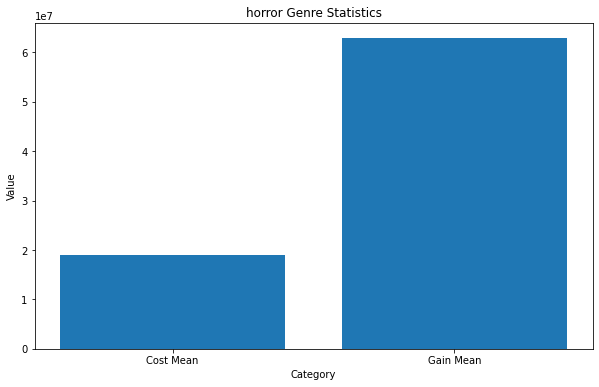

In [43]:
horror_data = pd.DataFrame({'Category': ['Cost Mean', 'Gain Mean'], 'Value': [horror_cost_mean, horror_gain_mean]})

# Plotting the DataFrame
plt.figure(figsize=(10, 6))
plt.bar(horror_data['Category'], horror_data['Value'])
plt.xlabel('Category')
plt.ylabel('Value')
plt.title('horror Genre Statistics')
plt.show()

# DOCUMENTARY

In [44]:
Documentary_cost = Documentary_df.merge(movie_budgetsCLEAN[['movie', 'production_budget']], on='movie', how='inner')
Documentary_cost['production_budget'] = Documentary_cost['production_budget'].astype(int)
Documentary_cost

,movie,genres,production_budget
0,samsara,documentary,4000000
1,inferno,documentary,75000000
2,believe,documentary,3500000
3,kingdom come,documentary,7000000
4,kingdom come,documentary,7000000
...,...,...,...
499,deadline,documentary,1800000
500,red dog,documentary,9100000
501,serendipity,documentary,28000000
502,fuel,documentary,2500000


In [45]:
Documentary_cost_mean = Documentary_cost['production_budget'].mean()
Documentary_cost_mean

25291082.095238097

In [46]:
Documentary_gain = Documentary_df.merge(movie_budgetsCLEAN[['movie', 'worldwide_gross']], on='movie', how='inner')
Documentary_gain['worldwide_gross'] = Documentary_gain['worldwide_gross'].astype('int64')
Documentary_gain

,movie,genres,worldwide_gross
0,samsara,documentary,5966671
1,inferno,documentary,219519367
2,believe,documentary,890303
3,kingdom come,documentary,23393939
4,kingdom come,documentary,23393939
...,...,...,...
499,deadline,documentary,0
500,red dog,documentary,20927794
501,serendipity,documentary,77477297
502,fuel,documentary,174255


In [47]:
Documentary_gain_mean= Documentary_gain['worldwide_gross'].mean()
Documentary_gain_mean

63110617.69246032

In [48]:
Documentary_roi = ((Documentary_gain_mean - Documentary_cost_mean) / Documentary_cost_mean) * 100
Documentary_roi

149.53704018992147

In [49]:
Documentary_data = {'Genre': ['Documentary'],
        'Cost Mean': [Documentary_cost_mean],
        'Gain Mean': [Documentary_gain_mean],}
Documentary_data

{'Genre': ['Documentary'],
 'Cost Mean': [25291082.095238097],
 'Gain Mean': [63110617.69246032]}

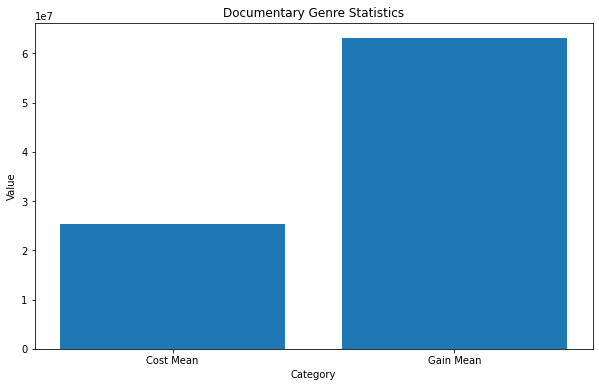

In [50]:
Documentary_data = pd.DataFrame({'Category': ['Cost Mean', 'Gain Mean'], 'Value': [Documentary_cost_mean, Documentary_gain_mean]})

# Plotting the DataFrame
plt.figure(figsize=(10, 6))
plt.bar(Documentary_data['Category'], Documentary_data['Value'])
plt.xlabel('Category')
plt.ylabel('Value')
plt.title('Documentary Genre Statistics')
plt.show()

# DRAMA

In [51]:
Drama_cost = Drama_df.merge(movie_budgetsCLEAN[['movie', 'production_budget']], on='movie', how='inner')
Drama_cost['production_budget'] = Drama_cost['production_budget'].astype(int)
Drama_cost

,movie,genres,production_budget
0,on the road,drama,25000000
1,on the road,drama,25000000
2,on the road,drama,25000000
3,on the road,drama,25000000
4,the secret life of walter mitty,drama,91000000
...,...,...,...
1832,molly,drama,21000000
1833,chicago,drama,30000000
1834,the blue bird,drama,1200000
1835,snow white and the seven dwarfs,drama,1488000


In [52]:
Drama_cost_mean = Drama_cost['production_budget'].mean()
Drama_cost_mean

23541712.281437125

In [53]:
Drama_gain = Drama_df.merge(movie_budgetsCLEAN[['movie', 'worldwide_gross']], on='movie', how='inner')
Drama_gain['worldwide_gross'] = Drama_gain['worldwide_gross'].astype('int64')
Drama_gain

,movie,genres,worldwide_gross
0,on the road,drama,9313302
1,on the road,drama,9313302
2,on the road,drama,9313302
3,on the road,drama,9313302
4,the secret life of walter mitty,drama,187861183
...,...,...,...
1832,molly,drama,17396
1833,chicago,drama,306770545
1834,the blue bird,drama,887000
1835,snow white and the seven dwarfs,drama,184925486


In [54]:
Drama_gain_mean= Drama_gain['worldwide_gross'].mean()
Drama_gain_mean

59248407.18726184

In [55]:
Drama_roi = ((Drama_gain_mean - Drama_cost_mean) / Drama_cost_mean) * 100
Drama_roi

151.6741623504583

In [56]:
Drama_data = {'Genre': ['Drama'],
        'Cost Mean': [Drama_cost_mean],
        'Gain Mean': [Drama_gain_mean],}

Drama_data

{'Genre': ['Drama'],
 'Cost Mean': [23541712.281437125],
 'Gain Mean': [59248407.18726184]}

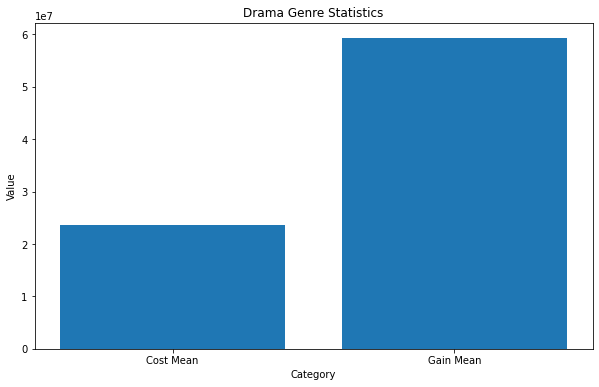

In [57]:
Drama_data = pd.DataFrame({'Category': ['Cost Mean', 'Gain Mean'], 'Value': [Drama_cost_mean, Drama_gain_mean]})

# Plotting the DataFrame
plt.figure(figsize=(10, 6))
plt.bar(Drama_data['Category'], Drama_data['Value'])
plt.xlabel('Category')
plt.ylabel('Value')
plt.title('Drama Genre Statistics')
plt.show()

In [58]:
def genre_stats(genre_df, budget_df):
    genre_cost = genre_df.merge(budget_df[['movie', 'production_budget']], on='movie', how='inner')
    genre_cost['production_budget'] = genre_cost['production_budget'].astype(int)
    genre_cost_mean = genre_cost['production_budget'].mean()
    genre_gain = genre_df.merge(budget_df[['movie', 'worldwide_gross']], on='movie', how='inner')
    genre_gain['worldwide_gross'] = genre_gain['worldwide_gross'].astype('int64')
    genre_gain_mean = genre_gain['worldwide_gross'].mean()
    genre_roi = ((genre_gain_mean - genre_cost_mean) / genre_cost_mean) * 100
    return genre_cost_mean, genre_gain_mean, genre_roi
horror_cost_mean, horror_gain_mean, horror_roi = genre_stats(Horror_df, movie_budgetsCLEAN)
documentary_cost_mean, documentary_gain_mean, documentary_roi = genre_stats(Documentary_df, movie_budgetsCLEAN)
drama_cost_mean, drama_gain_mean, drama_roi = genre_stats(Drama_df, movie_budgetsCLEAN)

In [65]:
def remove_punctuation(text):
    return text.str.replace('[{}]'.format(string.punctuation), '')

# Apply the function to the column
tmdb_moviesCLEAN['movie'] = remove_punctuation(tmdb_moviesCLEAN['movie'])

# Print the updated DataFrame
tmdb_moviesCLEAN

,Unnamed: 0,genre_ids,id,original_language,movie,popularity,release_date,title,vote_average,vote_count,Twords
0,0,adventure fantasy family,12444,en,harry potter and the deathly hallows part 1,33.533,2010-11-19,harry potter and the deathly hallows: part 1,7.7,10788,7
1,1,fantasy adventure animation family,10191,en,how to train your dragon,28.734,2010-03-26,how to train your dragon,7.7,7610,4
2,2,adventure action science fiction,10138,en,iron man 2,28.515,2010-05-07,iron man 2,6.8,12368,2
3,3,animation comedy family,862,en,toy story,28.005,1995-11-22,toy story,7.9,10174,1
4,4,action science fiction adventure,27205,en,inception,27.92,2010-07-16,inception,8.3,22186,0
...,...,...,...,...,...,...,...,...,...,...,...
26512,26512,horror drama,488143,en,laboratory conditions,0.6,2018-10-13,laboratory conditions,0.0,1,1
26513,26513,drama thriller,485975,en,exhibit84xxx,0.6,2018-05-01,_exhibit_84xxx_,0.0,1,0
26514,26514,fantasy action adventure,381231,en,the last one,0.6,2018-10-01,the last one,0.0,1,2
26515,26515,family adventure action,366854,en,trailer made,0.6,2018-06-22,trailer made,0.0,1,1


In [61]:
tmdb_moviesCLEAN['Twords'] = tmdb_moviesCLEAN['movie'].str.count(' ')
tmdb_moviesCLEAN

,Unnamed: 0,genre_ids,id,original_language,movie,popularity,release_date,title,vote_average,vote_count,Twords
0,0,adventure fantasy family,12444,en,harry potter and the deathly hallows part 1,33.533,2010-11-19,harry potter and the deathly hallows: part 1,7.7,10788,7
1,1,fantasy adventure animation family,10191,en,how to train your dragon,28.734,2010-03-26,how to train your dragon,7.7,7610,4
2,2,adventure action science fiction,10138,en,iron man 2,28.515,2010-05-07,iron man 2,6.8,12368,2
3,3,animation comedy family,862,en,toy story,28.005,1995-11-22,toy story,7.9,10174,1
4,4,action science fiction adventure,27205,en,inception,27.92,2010-07-16,inception,8.3,22186,0
...,...,...,...,...,...,...,...,...,...,...,...
26512,26512,horror drama,488143,en,laboratory conditions,0.6,2018-10-13,laboratory conditions,0.0,1,1
26513,26513,drama thriller,485975,en,exhibit84xxx,0.6,2018-05-01,_exhibit_84xxx_,0.0,1,0
26514,26514,fantasy action adventure,381231,en,the last one,0.6,2018-10-01,the last one,0.0,1,2
26515,26515,family adventure action,366854,en,trailer made,0.6,2018-06-22,trailer made,0.0,1,1


In [62]:
Extract = ['popularity', 'Twords']
Words_per_pop = tmdb_moviesCLEAN[Extract]
#add 1, because we counted by spaces, not words
Words_per_pop['Twords'] += 1
Words_per_pop['popularity'] = Words_per_pop['popularity'].astype(float)
Words_per_pop

,popularity,Twords
0,33.533,8
1,28.734,5
2,28.515,3
3,28.005,2
4,27.920,1
...,...,...
26512,0.600,2
26513,0.600,1
26514,0.600,3
26515,0.600,2


In [63]:
df_new = Words_per_pop.groupby('Twords')['popularity'].mean().reset_index()

# Transpose the DataFrame to have 'Twords' as columns
df_new = df_new.set_index('Twords').T
df_new = df_new.drop(columns=df_new.columns[df_new.columns.astype(int) > 10])
print(df_new)

Twords            1         2         3         4         5         6   \
popularity  3.722437  3.331634  3.037892  2.890077  2.870612  2.529167   

Twords           7        8         9         10  
popularity  2.37613  2.31466  1.594716  1.444427  


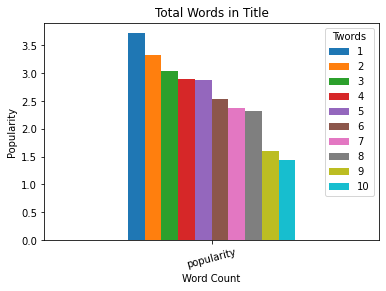

In [64]:
# Plot the bar graph
df_new.plot(kind='bar')

# Set the x-axis label
plt.xlabel('Word Count')
plt.xticks(rotation=15)

# Set the y-axis label
plt.ylabel('Popularity')

# Set the title
plt.title('Total Words in Title')

# Show the bar graph
plt.show()